In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.dates import DateFormatter

sns.set()
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.precision", 2)
mpl.rcParams['timezone'] = 'UTC'

In [15]:
DATA_URL="../data/raw_sales.csv"
ACCURACIES_MONTHLY_URL="../results/accuracies_monthly.csv"
ACCURACIES_URL="../results/accuracies.csv"

In [16]:
df = pd.read_csv(DATA_URL)
res = pd.read_csv(ACCURACIES_URL)
res_monthly = pd.read_csv(ACCURACIES_MONTHLY_URL)


In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [18]:
df['datesold'] = pd.to_datetime(df['datesold'], format="%Y-%m-%d %H:%M:%S")
df = df[df['propertyType'] == "house"]
df.dropna()

res = res.drop(columns=["Unnamed: 0"])
res_monthly = res_monthly.drop(columns=["Unnamed: 0"])

In [19]:
colors =['red', 'pink', 'limegreen', 'violet', 'blue', 'purple']

color_dict = dict(zip(np.unique(df['bedrooms']),colors))

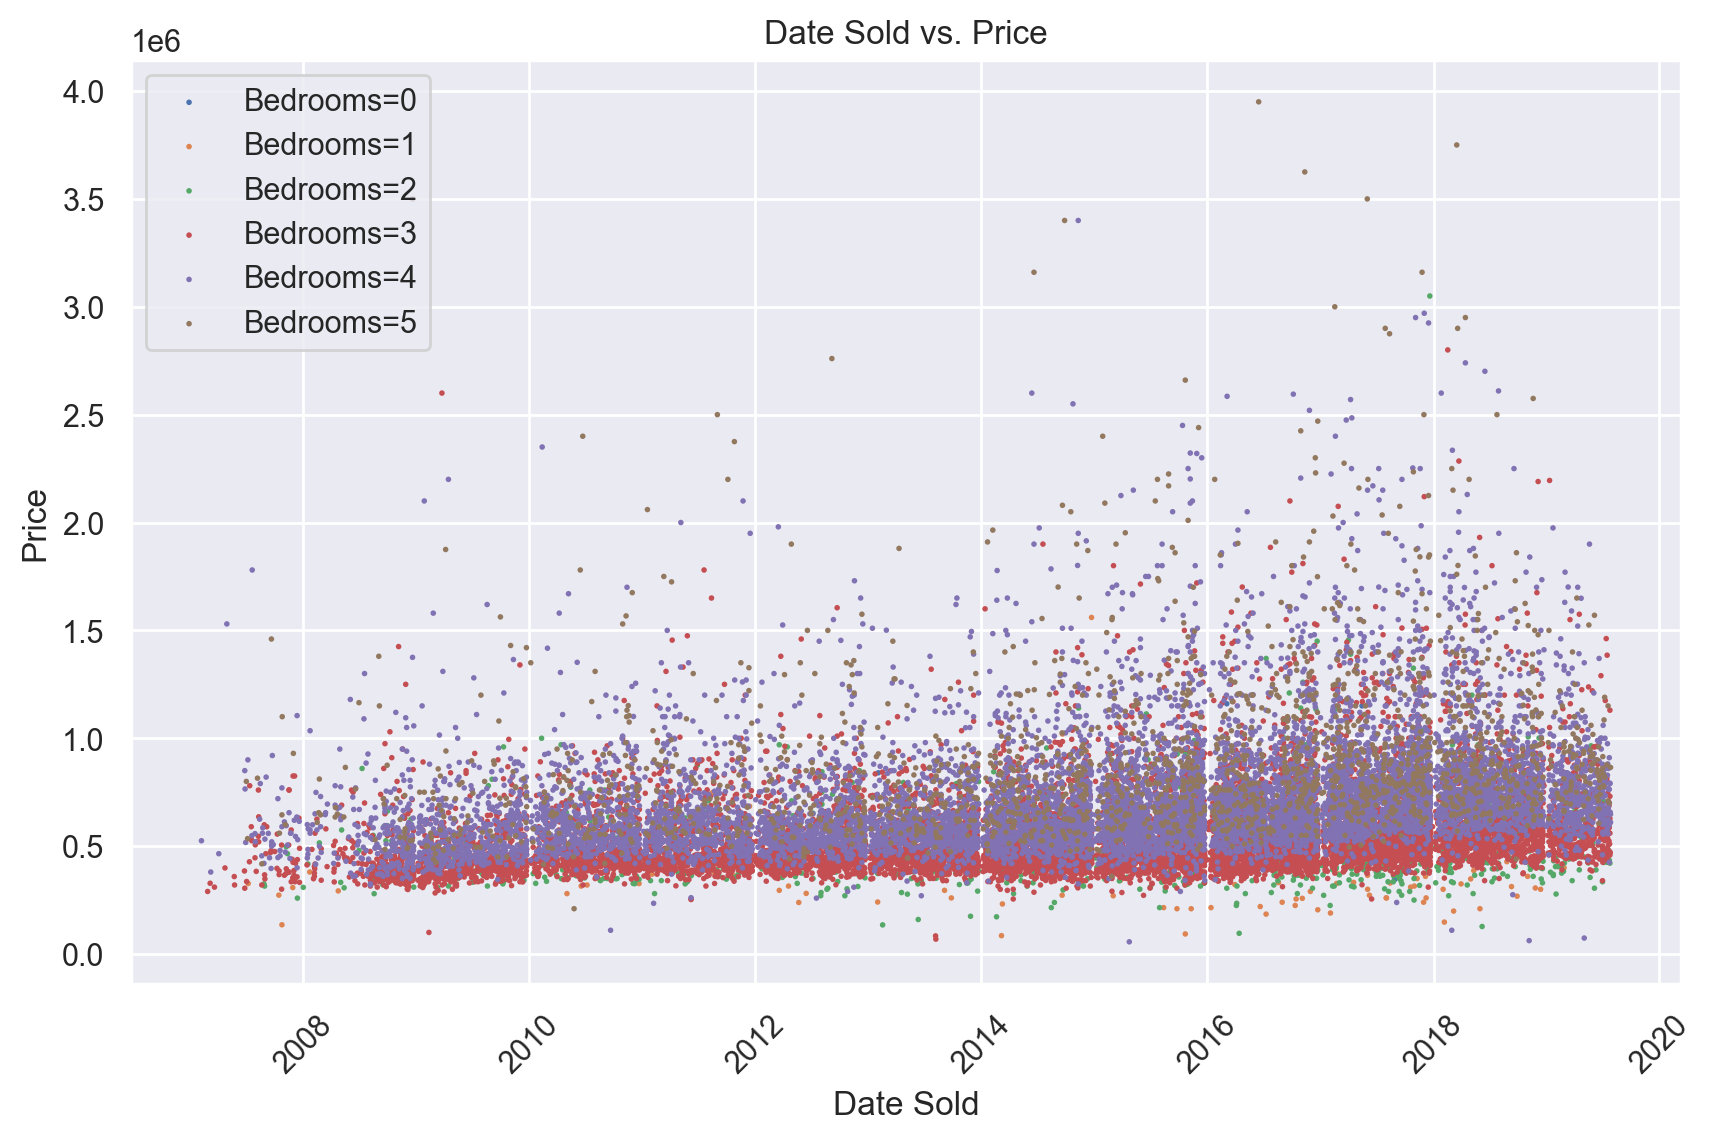

In [20]:



# df=df[np.unique(df["datesold"])]
data = df[df["bedrooms"] < 6][df["price"] < 4000000]
plt.figure(figsize=(10, 6))
# plt.scatter(data['datesold'], data['price'], 
#             c= data['bedrooms'].map(color_dict), 
#             alpha=0.7,
#             s=0.5)

data['colors']=data['bedrooms'].map(color_dict)
k=0
for i, dff in data.groupby("bedrooms"):
    plt.scatter(dff['datesold'], dff['price'], s=4, 
                edgecolors='none', label="Bedrooms={}".format(i))
    k +=1
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('Date Sold vs. Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

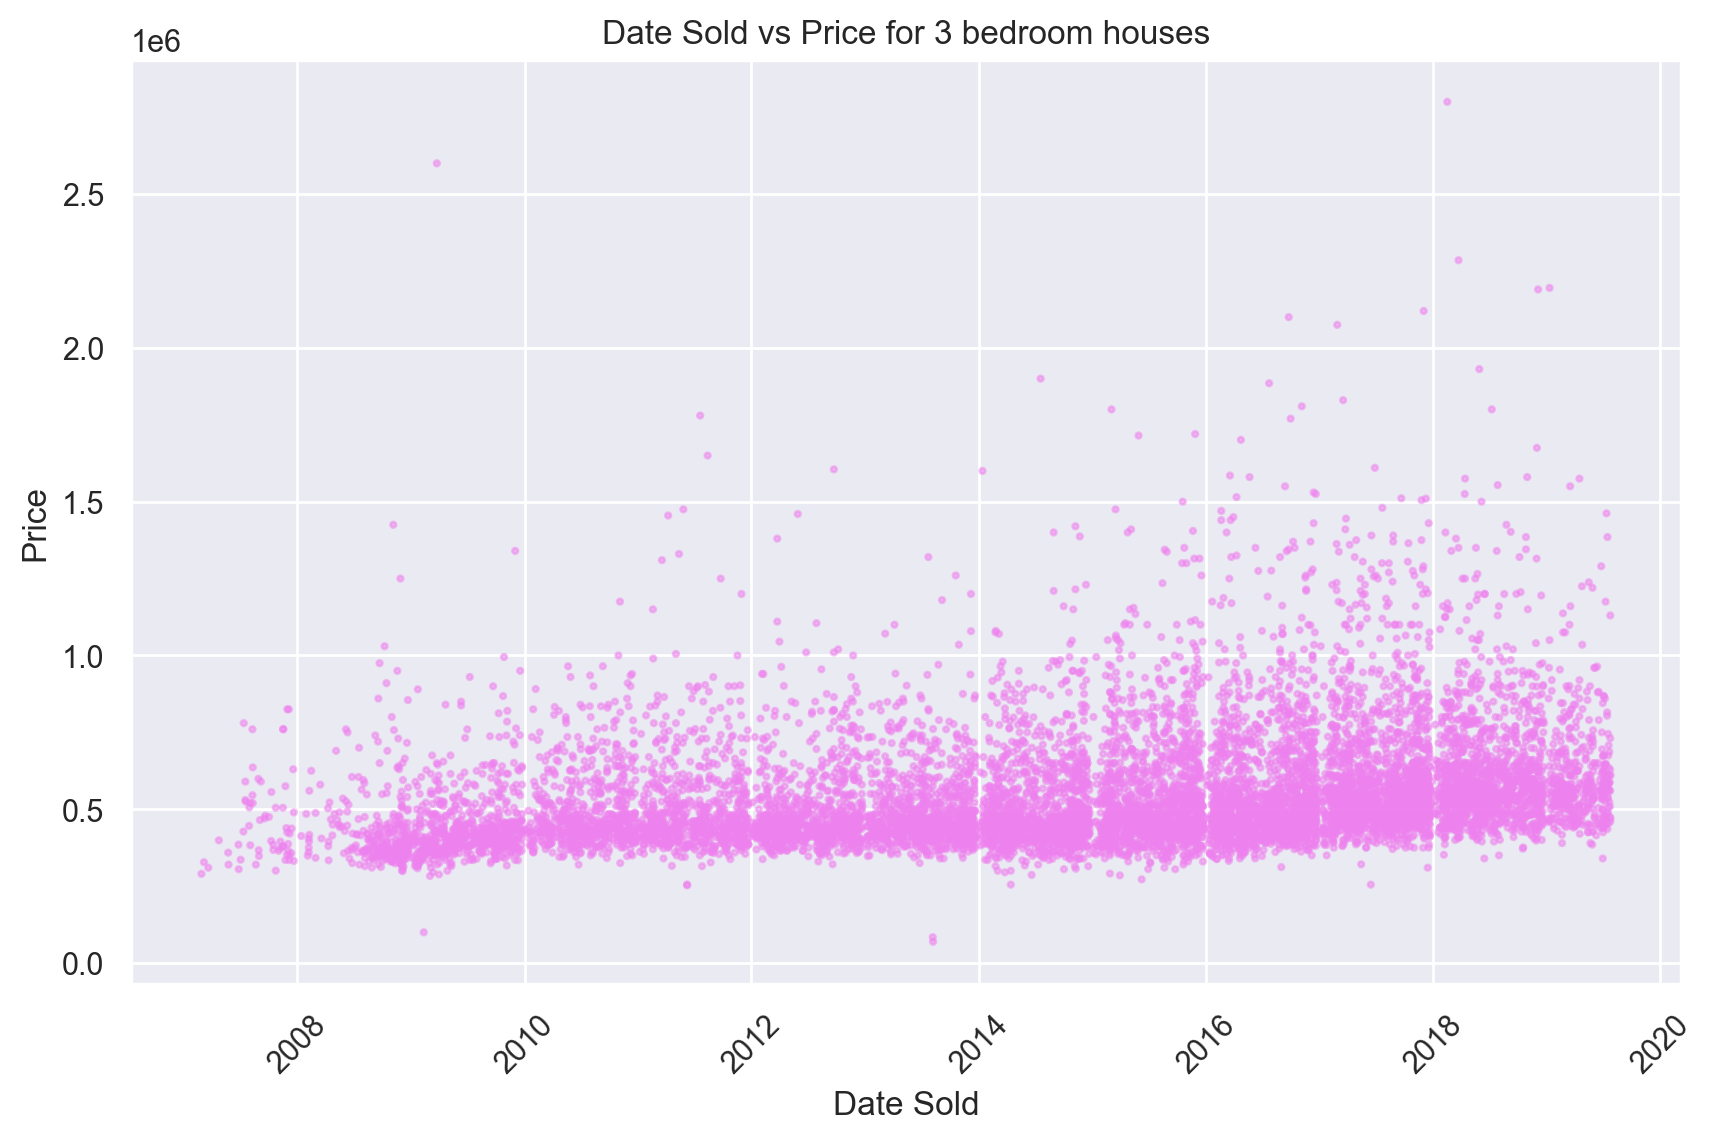

In [21]:
data=df[df['bedrooms']==3]
data = data[data['price'] < 4000000]
plt.figure(figsize=(10, 6))
plt.scatter(data['datesold'], data['price'], 
            c= data['bedrooms'].map(color_dict), 
            alpha=0.5,
            s=4)
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('Date Sold vs Price for 3 bedroom houses')
plt.xticks(rotation=45)  
plt.show()

Text(0, 0.5, 'Price $')

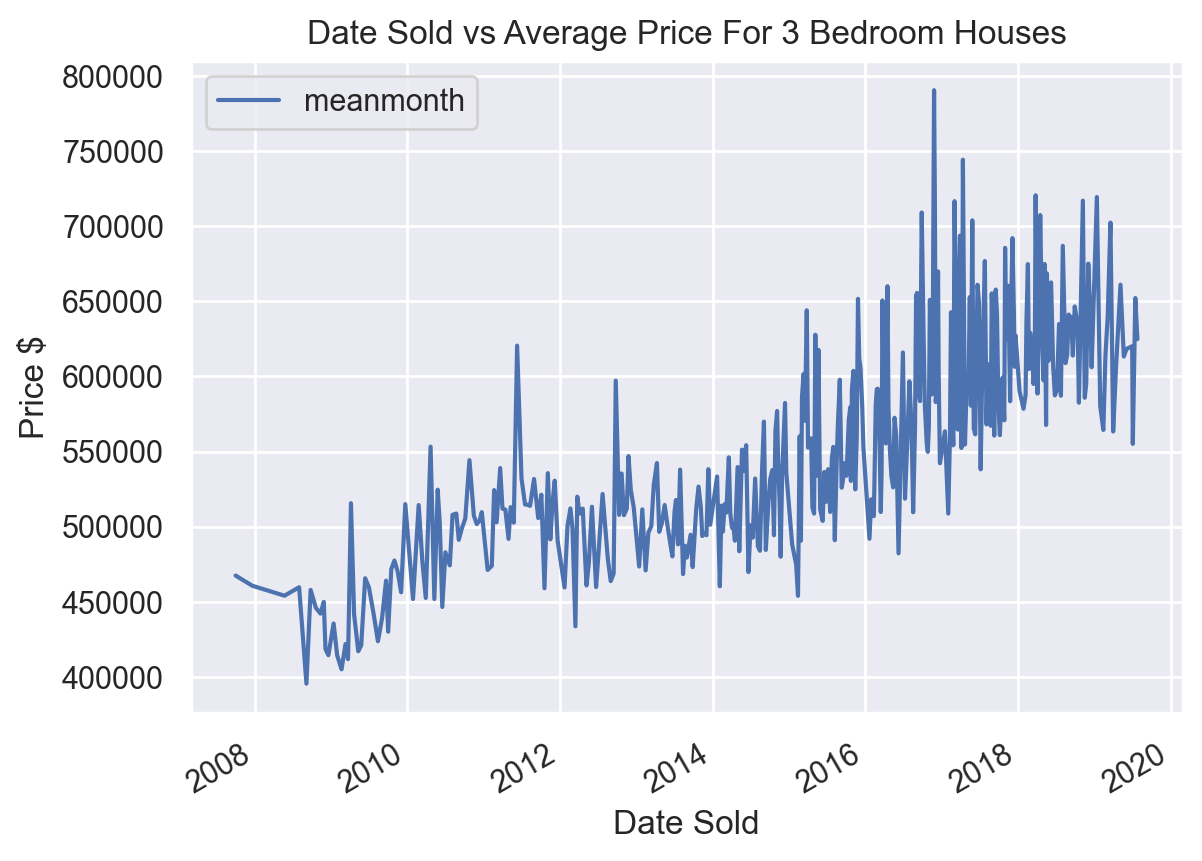

In [22]:

data = df[["datesold", "price", "bedrooms"]]
data = data[data["bedrooms"] == 3]
data["intdate"] = data["datesold"]

data["meanmonth"] = data["price"].rolling(30).mean()


data = data.iloc[::30]
# data.head()
data.plot("datesold", "meanmonth")
plt.title("Date Sold vs Average Price For 3 Bedroom Houses")
plt.xlabel('Date Sold')
plt.ylabel("Price $")





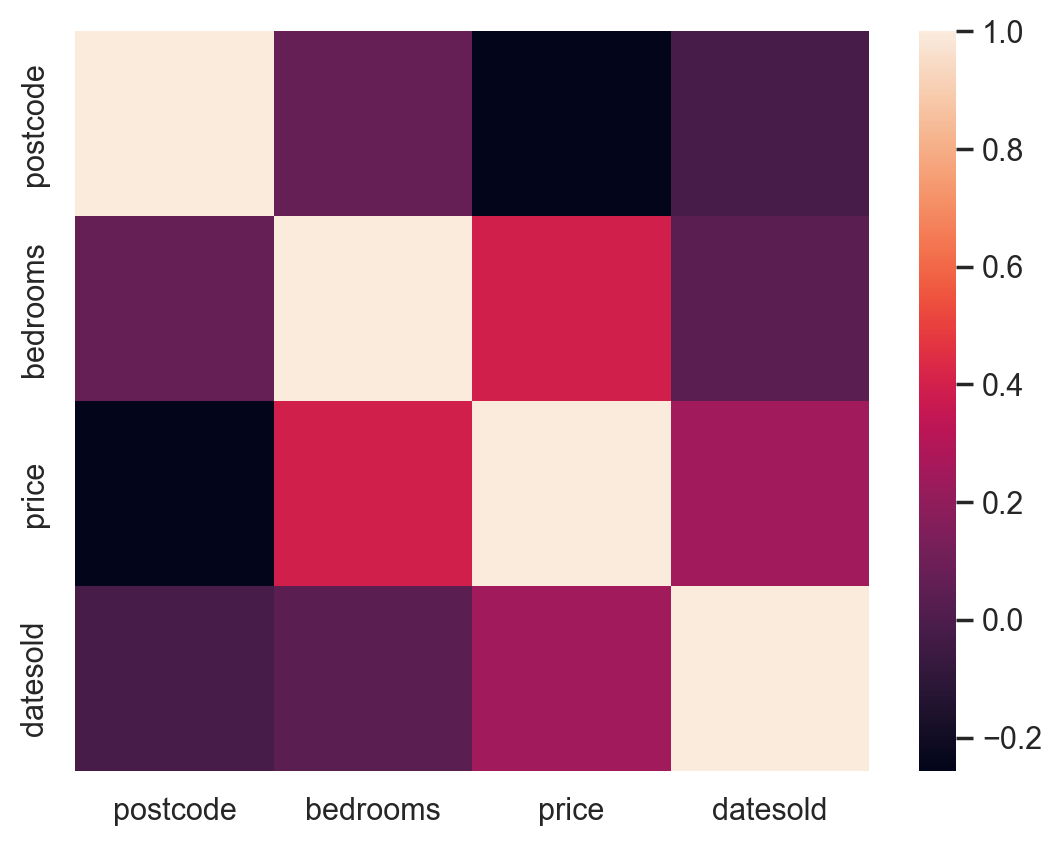

In [23]:
data = df 
data["datesold"] = data["datesold"].map(lambda x: x.timestamp())

numerical = list(set(data.columns) - set(["propertyType"]))

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);


Results

Predicting tommorow's price:

<Axes: title={'center': "Tommorow's Price Prediction Accuracy vs Num_lags"}, xlabel='num_lags'>

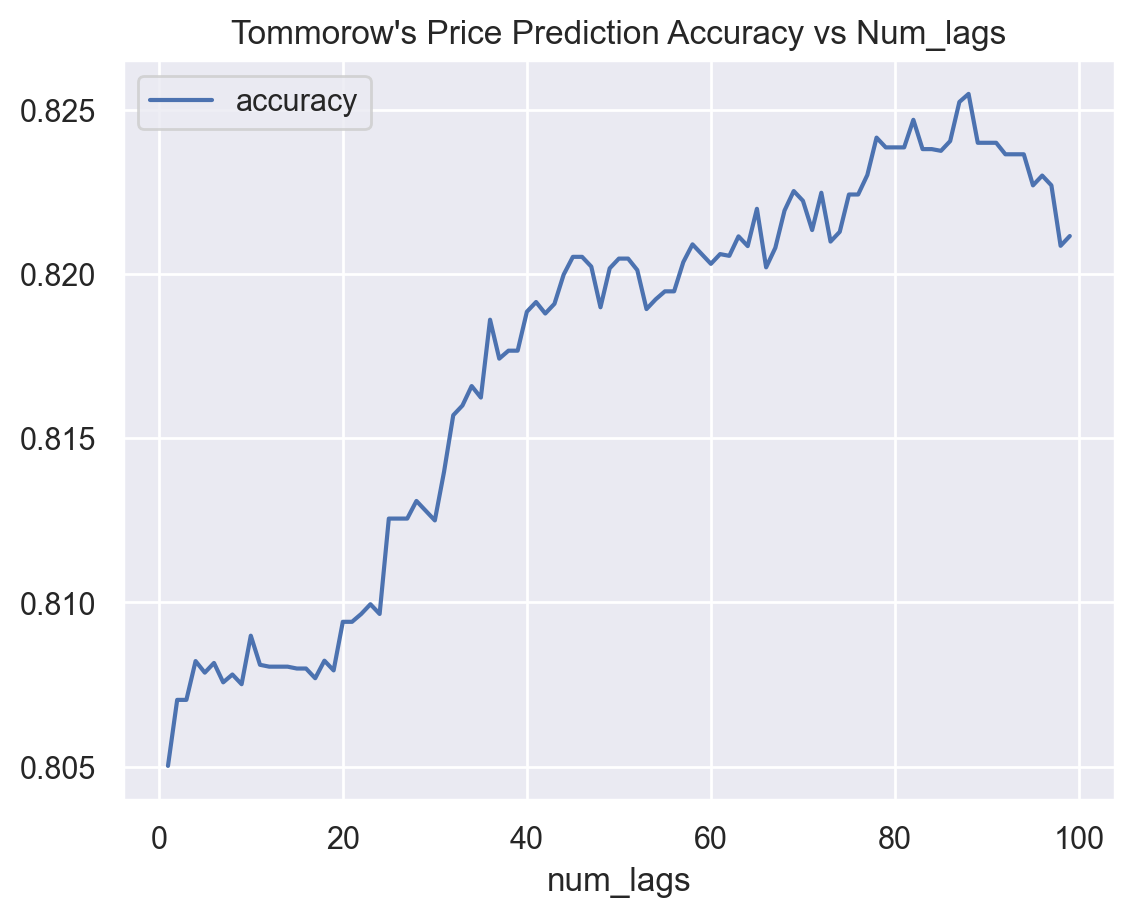

In [24]:
res.groupby("num_lags").sum().plot(title="Tommorow's Price Prediction Accuracy vs Num_lags")

Predicting average in the next month

<Axes: title={'center': "Next Month's Average Price Prediction Accuracy vs Num_lags"}, xlabel='num_lags'>

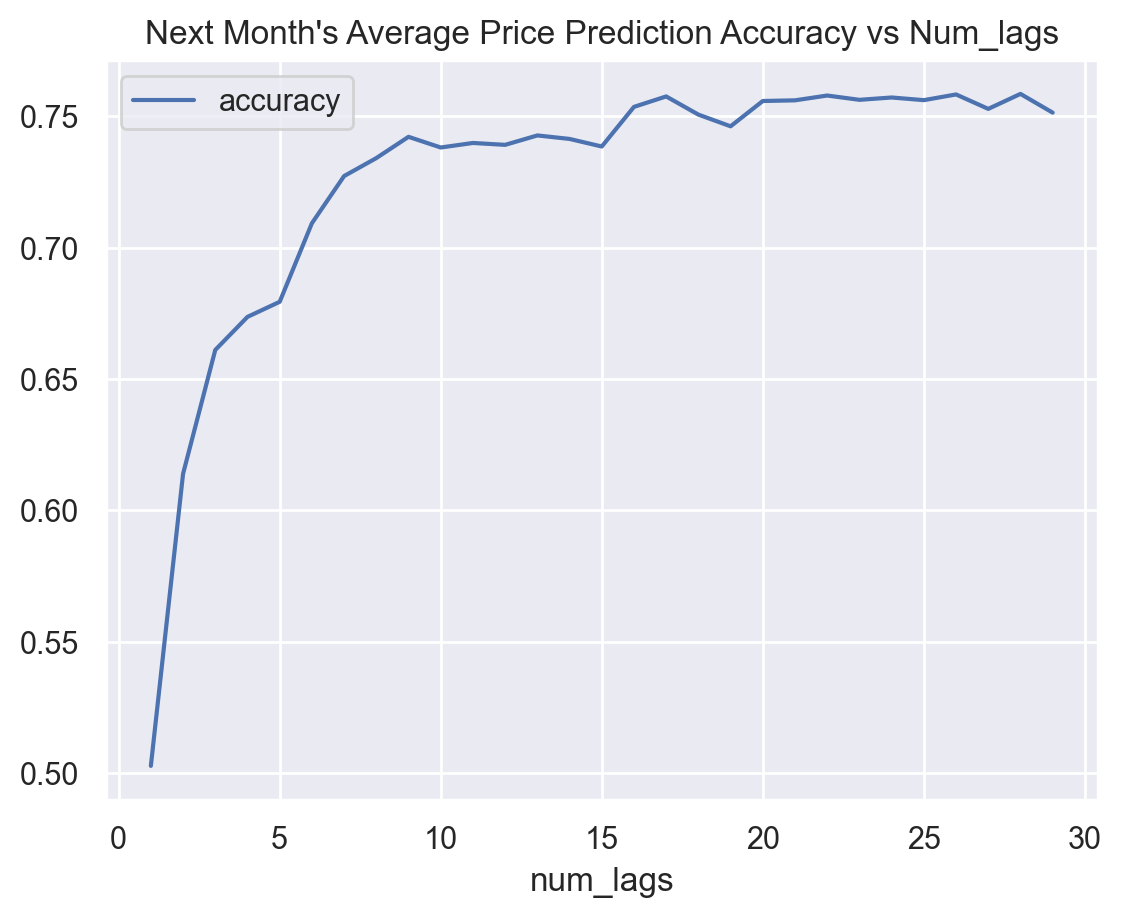

In [25]:
res_monthly.groupby("num_lags").sum().plot(title="Next Month's Average Price Prediction Accuracy vs Num_lags")